## Importing Librarires :

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt #matplotlib
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn import svm
import seaborn as sns

## Import the Dataset

In [9]:
csvfile = pd.read_csv("iris.data",header = None)  
df = csvfile.rename(columns = {0:'sepal_length' ,1:'sepal_width',2:'petal_length',3:'petal_width',4:'class'})
df

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


## Spilit the Dataset

In [3]:
y = df['class']
X = df[['sepal_length','sepal_width', 'petal_length', 'petal_width']]
X1_train, X1_test, y1_train_target, y1_test_target = train_test_split(X, y, test_size = 0.75, random_state = 50)
X2_train, X2_test, y2_train_target, y2_test_target = train_test_split(X, y, test_size = 0.20, random_state = 50)
data_train1 = pd.concat([X1_train, y1_train_target], axis = 1)
data_train2 = pd.concat([X2_train, y2_train_target], axis = 1)
data_test1 = pd.concat([X1_test, y1_test_target], axis=1)
data_test2 = pd.concat([X2_test, y2_test_target], axis=1)
data_train1.reset_index(drop=True, inplace=True)
data_train2.reset_index(drop=True, inplace=True)
data_test1.reset_index(drop=True, inplace=True)
data_test2.reset_index(drop=True, inplace=True)

## Training and Testing the Model

In [4]:
# defining SVM classifier 
classifier = svm.SVC(kernel ="linear")
classifier.fit(X1_train,y1_train_target)
prediction = classifier.predict(X1_test)


## Performance of Model via Confusion Matrix

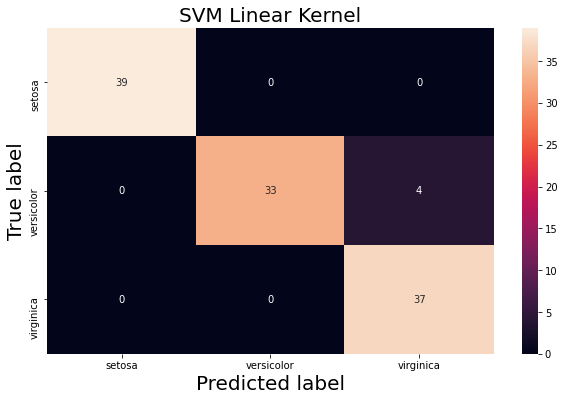

In [5]:
cm1 = confusion_matrix(y1_test_target, y_pred=prediction) 
cm_df1 = pd.DataFrame(cm1,index = ['setosa','versicolor','virginica'],columns = ['setosa','versicolor','virginica'])

fig = plt.figure(figsize=(10,6))
fig.set_facecolor("white") 
sns.heatmap(cm_df1, annot=True)
plt.title('SVM Linear Kernel',fontsize=20)
plt.ylabel('True label',fontsize=20)
plt.xlabel('Predicted label',fontsize=20) 
plt.show()

## Accuracy

In [7]:
acc1 = accuracy_score(y1_test_target,y_pred=prediction)
print("accuracy of the model when test split is 75% is : ",acc1)
clsfm1 = classification_report(y1_test_target,y_pred=prediction)
print("classification report of model is : \n",clsfm1)

accuracy of the model when test split is 75% is :  0.9646017699115044
classification report of model is : 
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        39
Iris-versicolor       1.00      0.89      0.94        37
 Iris-virginica       0.90      1.00      0.95        37

       accuracy                           0.96       113
      macro avg       0.97      0.96      0.96       113
   weighted avg       0.97      0.96      0.96       113



## Split Ratio Change for Testing

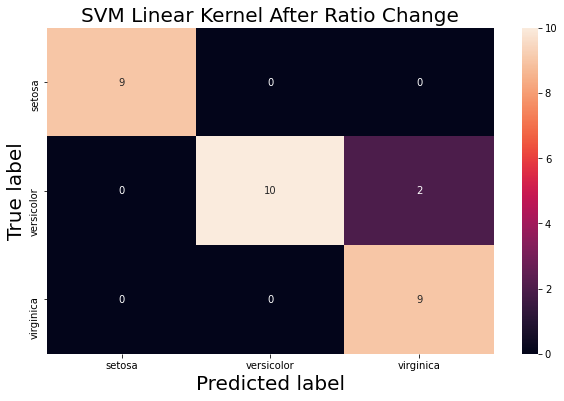

accuracy of the model when test split is 20% is :  0.9333333333333333
classification report of model is : 
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         9
Iris-versicolor       1.00      0.83      0.91        12
 Iris-virginica       0.82      1.00      0.90         9

       accuracy                           0.93        30
      macro avg       0.94      0.94      0.94        30
   weighted avg       0.95      0.93      0.93        30



In [8]:
# defining classifier
classifier = svm.SVC(kernel ="linear")
classifier.fit(X2_train,y2_train_target)
prediction = classifier.predict(X2_test)

# confusion matrix
cm2 = confusion_matrix(y2_test_target, y_pred=prediction) 
cm_df2 = pd.DataFrame(cm2,index = ['setosa','versicolor','virginica'],columns = ['setosa','versicolor','virginica'])

# plotting confusion matrix
fig = plt.figure(figsize=(10,6))
fig.set_facecolor("white") 
sns.heatmap(cm_df2, annot=True)
plt.title('SVM Linear Kernel After Ratio Change',fontsize=20)
plt.ylabel('True label',fontsize=20)
plt.xlabel('Predicted label',fontsize=20) 
plt.show()

# calculating accuracy and classification report
acc2 = accuracy_score(y2_test_target,y_pred=prediction)
print("accuracy of the model when test split is 20% is : ",acc2)
clsfm2 = classification_report(y2_test_target,y_pred=prediction)
print("classification report of model is : \n",clsfm2)